In [ ]:
import pandas as pd
import numpy as np
import sympy as sp
import os 
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [1]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE'
#FILENAME = 'Data/president_heights.csv'
#os.chdir(DIR)
#df = pd.read_csv(FILENAME) # read the csv file on to a dataframe 

In [ ]:
def plotVectors(X, vectornames = None):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('Vectors in standard positions')
  origin = np.array([np.zeros(len(X)), np.zeros(len(X))]) # origin point
  colors = cm.rainbow(np.linspace(0, 1, len(X))) # colors for vectors  
  plt.axvline(0)
  plt.axhline(0)
  ax.quiver(*origin, X[:,0], X[:,1], color = colors,
            angles = 'xy', scale_units ='xy', scale = 1)
  axlim = np.max(abs(X))
  ax.axis('equal')
  ax.set_xlim([-axlim-5, axlim+5])
  ax.set_ylim([-axlim-5, axlim+5])
  # Change step = step = np.ceil(axlim/2) for different grid position
  ax.set_xticks(np.arange(-axlim-5, axlim+5+1, step = 1))
  ax.set_yticks(np.arange(-axlim-5, axlim+5+1, step = 1))
  for k in range(0, len(X)):
    if k+1 > len(vectornames):
      name = ''
    else:
      name = vectornames[k]  
    ax.text(X[k, 0]*1.1, X[k, 1]*1.1, name,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize = 11)

In [ ]:
# Solve a linear system of equations using sympy
# x_1 + 2x_2 = 4 and 2x_1+x_2 = 3
# See https://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve

# Augmented matrix
#b1, b2, b3, b4 = sp.symbols('b1, b2, b3, b4')
A = sp.Matrix(([0, 1/np.sqrt(2), 1/np.sqrt(2), 0], [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
               ,[-1, 0, 0, 0]))
print(A.rref())

# Define symbolic variables for the unknowns
x1, x2, x3 = sp.symbols('x1, x2, x3')

# Solve the linear system of equations for the unknowns
sp.linsolve(A, (x1, x2, x3))

# Dot products
v1 = np.array([0, 0, -1])
v2 = (1/np.sqrt(2))*np.array([1, 1, 0])
v3 = (1/np.sqrt(2))*np.array([1, -1, 0])
print(np.linalg.norm(v1))
np.dot(v2, v3)

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]), (0, 1, 2))
1.0


0.0

{(4, 3)}

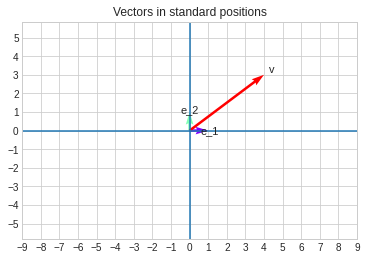

In [ ]:
# Standard basis vectors in R^2
e1 = np.array([1, 0]) 
e2 = np.array([0, 1])

# A vector in R^2
v = np.array([4, 3]) 

plotVectors(np.array([e1, e2, v]),
            ['e_1', 'e_2', 'v'])

# Coordinates of vector in standard basis
# See https://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve
a, b = sp.symbols('a, b')
sp.linsolve(sp.Matrix(([1, 0, 4], [0, 1, 3])), (a, b))

{(2/3, 5/3)}

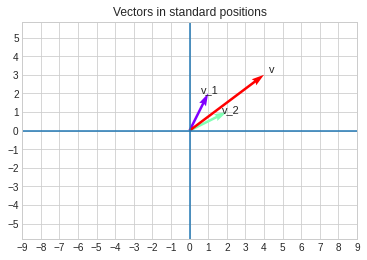

In [ ]:
# Basis vectors in R^2
v1 = np.array([1, 2]) 
v2 = np.array([2, 1]) 

# A vector in R^2
v = np.array([4, 3])

plotVectors(np.array([v1, v2, v]), ['v_1', 'v_2', 'v'])

{(2/3, 5/3)}

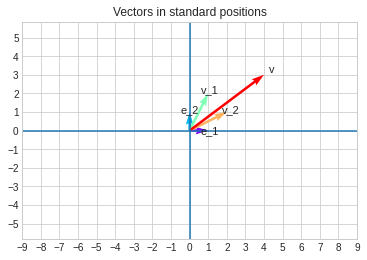

In [ ]:
# Standard basis vectors in R^2
e1 = np.array([1, 0]) 
e2 = np.array([0, 1])

# Basis vectors in R^2
v1 = np.array([1, 2]) 
v2 = np.array([2, 1]) 

# A vector in R^2
v = np.array([4, 3]) 

plotVectors(np.array([e1, e2, v1, v2, v]),
            ['e_1', 'e_2', 'v_1', 'v_2', 'v'])

# Coordinates of vector in standard basis
# See https://docs.sympy.org/latest/modules/solvers/solveset.html#sympy.solvers.solveset.linsolve
x1, x2 = sp.symbols('x1, x2')
sp.linsolve(sp.Matrix(([1, 2, 4], [2, 1, 3])), (x1, x2))

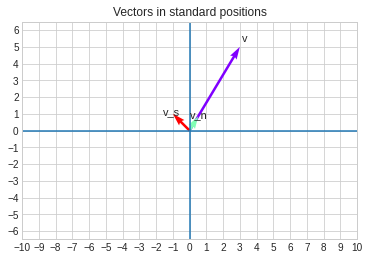

In [ ]:
v = np.array([3, 5]) # a vector
v_normalized = v / np.linalg.norm(v) # its normalized version
v_standardized = (v - np.mean(v))/(np.std(v)) # its standardized version

plotVectors(np.array([v, v_normalized, v_standardized,]),
            ['v', 'v_n', 'v_s'])


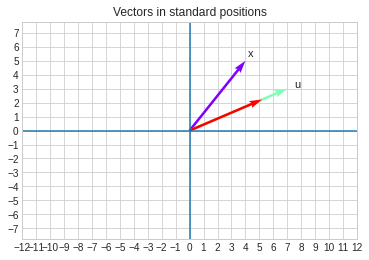

In [ ]:
# Projection of a vector on to the direction of another vector
x = np.array([4, 5]) # a vector which we want to project
u = np.array([7, 3]) # a vector on to which we want to project

u_normalized = u / np.linalg.norm(u) # direction of u
scalar_projection = np.dot(u_normalized, x) # shadow length
vector_projection = scalar_projection * u_normalized # shadow length x direction

plotVectors(np.array([x, u, vector_projection,]),
            ['x', 'u', ''])
